In [1]:
%cd Z:\Workspace\DD\20190401
%ls

Z:\Workspace\DD\20190401
 Volume in drive Z is ws0.home.hongxwing
 Volume Serial Number is 66EA-8510

 Directory of Z:\Workspace\DD\20190401

04/01/2019  12:57 PM    <DIR>          .
04/01/2019  12:48 PM    <DIR>          ..
04/01/2019  12:58 PM               746 parse.py
04/01/2019  12:51 PM    <DIR>          result
               1 File(s)            746 bytes
               3 Dir(s)  495,335,849,984 bytes free


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import itertools
import tensorflow as tf
def all_tags(path):
    result = set()
    for e in tf.train.summary_iterator(path):
        for x in e.summary.value:
            if not x.tag in result:
                result.add(x.tag)
    return result
def fetch_tag(path, target_tag, *islice_args):
    all_records = tf.train.summary_iterator(path)
    def flat(xs):
        for x in xs:
            for y in x.summary.value:
                yield {'step': x.step, 'value': y.simple_value, 'tag': y.tag}
    all_values = flat(all_records)
    all_values_of_tag = filter(lambda x: x['tag']==target_tag, all_values)
    return itertools.islice(all_values_of_tag, *islice_args)

In [13]:
path = "./result/events.out.tfevents.1553592971.dd-desktop"

In [35]:
def fetch_tag_as_array(path, target_tag, *islice_args):
    xs = []
    ys = []
    for v in fetch_tag(path, target_tag, *islice_args):
        xs.append(v['step'])
        ys.append(v['value'])
    return np.array(xs), np.array(ys)

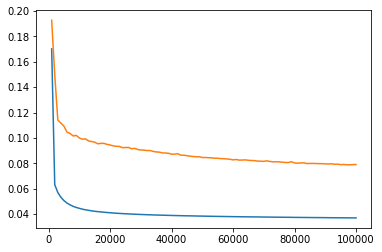

In [44]:
xs_ma, ys_ma = fetch_tag_as_array(path, 'minibatch/avg_loss', 100)
xs_vm, ys_vm = fetch_tag_as_array(path, 'valid/mape', 100)
plt.plot(xs_ma, ys_ma, xs_vm*1000, ys_vm)

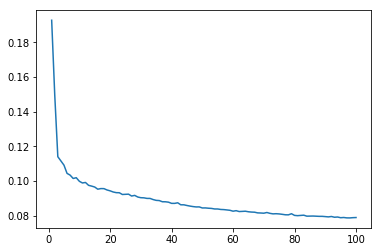

In [33]:

plt.plot(xs, ys)